In [1]:
from __future__ import (absolute_import, division, print_function, unicode_literals)
import backtrader as bt
import pandas as pd
from pandas.tseries.offsets import DateOffset
import os
from datetime import datetime
from operator import attrgetter

In [2]:
from backtrader.converts import ConvertStrategy, ConvertInfo, ConvertPandasData

In [3]:
data_folder = r"D:\Documents\trading\converts\data"

In [ ]:
info_df1 = pd.read_excel(os.path.join(data_folder, "{}.csv".format(code)))

In [17]:
info_df2 = pd.read_excel(os.path.join(data_folder, "convert_redemption2.xlsx"))
info_df2 = info_df2[(info_df2.delist_Date >= "2018-01-01") & (info_df2.list_date <= "2021-06-01")].set_index('code')
all_data = {code: pd.read_csv(os.path.join(data_folder, "{}.csv".format(code)), parse_dates=[0], index_col=0, encoding='utf-8') for code in info_df2.index}

In [18]:
info_df2

,short_name,full_name,list_status,issuer,company_code,issue_par,is_guarantee,convert_start_date,convert_end_date,convert_code,...,bond_form_id,bond_form,list_date,delist_Date,interest_begin_date,maturity_date,interest_date,last_cash_date,redeem_price,interest_schedule
code,,,,,,,,,,,,,,,,,,,,,
127034,绿茵转债,天津绿茵景观生态建设股份有限公司公开发行可转换公司债券,正常上市,天津绿茵景观生态建设股份有限公司,002887.XSHE,100,0,2021-11-11,2027-04-29,2887.0,...,704001,记账式,2021-05-28,2027-04-30,2021-04-30,2027-04-30,2021-04-30,2027-04-30,113.0,0.40@@0.60@@1.00@@1.50@@2.50@@3.00
113624,正川转债,重庆正川医药包装材料股份有限公司公开发行可转换公司债券,正常上市,重庆正川医药包装材料股份有限公司,603976.XSHG,100,1,2021-11-08,2027-04-27,603976.0,...,704001,记账式,2021-06-01,2027-04-27,2021-04-28,2027-04-28,2021-04-28,2027-04-28,115.0,0.50@@0.70@@1.20@@1.80@@2.40@@3.00
113048,晶科转债,晶科电力科技股份有限公司公开发行可转换公司债券,正常上市,晶科电力科技股份有限公司,601778.XSHG,100,0,2021-10-29,2027-04-22,601778.0,...,704001,记账式,2021-05-31,2027-04-22,2021-04-23,2027-04-23,2021-04-23,2027-04-23,112.0,0.30@@0.50@@1.00@@1.50@@1.80@@2.00
123113,仙乐转债,仙乐健康科技股份有限公司向不特定对象发行可转换公司债券,正常上市,仙乐健康科技股份有限公司,300791.XSHE,100,0,2021-10-25,2027-04-18,300791.0,...,704001,记账式,2021-05-14,2027-04-19,2021-04-19,2027-04-19,2021-04-19,2027-04-19,113.0,0.4@@0.6@@1.0@@1.5@@2.0@@3.0
127033,中装转2,深圳市中装建设集团股份有限公司向不特定对象发行可转换公司债券,正常上市,深圳市中装建设集团股份有限公司,002822.XSHE,100,0,2021-10-22,2027-04-15,2822.0,...,704001,记账式,2021-05-24,2027-04-16,2021-04-16,2027-04-16,2021-04-16,2027-04-16,112.0,0.30@@0.50@@1.00@@1.50@@1.80@@2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113512,景旺转债,深圳市景旺电子股份有限公司公开发行可转换公司债券,终止上市,深圳市景旺电子股份有限公司,603228.XSHG,100,0,2019-01-14,2024-07-05,603228.0,...,704001,记账式,2018-07-24,2019-04-30,2018-07-06,2024-07-06,2021-07-06,2024-07-06,108.0,0.4@@0.6@@1.0@@1.5@@1.8@@2.0
110032,三一转债,三一重工股份有限公司公开发行可转换公司债券,终止上市,三一重工股份有限公司,600031.XSHG,100,0,2016-07-04,2022-01-03,600031.0,...,704001,记账式,2016-01-18,2019-03-26,2016-01-04,2022-01-04,2021-01-04,2022-01-04,106.0,0.2@@0.5@@1.0@@1.5@@1.6@@2.0
113010,江南转债,江苏江南水务股份有限公司公开发行可转换公司债券,终止上市,江苏江南水务股份有限公司,601199.XSHG,100,0,2016-09-26,2022-03-17,601199.0,...,704001,记账式,2016-04-05,2019-02-20,2016-03-18,2022-03-18,2021-03-18,2022-03-18,108.0,0.3@@0.5@@1.0@@1.5@@1.8@@2.0


In [16]:
all_data = {code: pd.read_csv(os.path.join(data_folder, "{}.csv".format(code)), parse_dates=[0], index_col=0, encoding='utf-8') for code in info_df2.index if code not in [128064, 123066, 123007, 113509, 128032, 113040, 113611, 127023, 123058, 113543]}

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Documents\\trading\\converts\\data\\110065.csv'

In [6]:
for code in info_df2.index:
    try:
        pd.read_csv(os.path.join(data_folder, "{}.csv".format(code)), parse_dates=[0], index_col=0, encoding='utf-8')
    except:
        print(code)

123038
128064
123066
123007
113509
128032
113040
113611
127023
123058
113543
110065
113559
113041
110031
113564
128126
113557
110069
128012
128052
113038
113029
128028
127008
128112
128065
128010
113590
113592
113583
123055
128115
123017
128110
113587
113008
113035
113556
113586
128019
113032
128104
113520
128102
123026
113562
123036
113581
123032
128058
113553
113555
128098
113521
113020
128099
113571
128043
128067
128092
128084
128045
123037
113028
113544
113547
123020
113554
128088
128089
110042
128059
128086
123041
113019
113514
113031
123040
113518
113022
113558
128080
113552
128077
128054
113551
113515
113511
113503
113531
128055
123021
128016
128038
110050
123019
113517
128060
123009
128061
113540
113510
110046
123016
110054
113539
128068
113522
128020
113538
123003
113523
113533
110030
110049
113529
113507
128047
128027
123001
127009
127010
113015
128024
110040
113513
113018
123006
123008
113506
113512
110032
113010
123005
110039


In [28]:
info_df2[info_df2.interest_date.isna()]

,short_name,full_name,list_status,issuer,company_code,issue_par,is_guarantee,convert_start_date,convert_end_date,convert_code,...,bond_form_id,bond_form,list_date,delist_Date,interest_begin_date,maturity_date,interest_date,last_cash_date,redeem_price,interest_schedule
code,,,,,,,,,,,,,,,,,,,,,
113502,嘉澳转债,浙江嘉澳环保科技股份有限公司公开发行A股可转换公司债券,正常上市,浙江嘉澳环保科技股份有限公司,603822.XSHG,100,1,2018-05-17,2023-11-09,603822.0,...,704001,记账式,2017-11-27,2023-11-10,2017-11-10,2023-11-10,NaT,2023-11-10,108.0,0.4@@0.6@@1.0@@1.5@@1.8@@2.0


In [26]:
info_df2.columns

Index(['code', 'short_name', 'full_name', 'list_status', 'issuer',
       'company_code', 'issue_par', 'is_guarantee', 'convert_start_date',
       'convert_end_date', 'convert_code', 'exchange', 'coupon_type',
       'coupon_frequency', 'payment_type_id', 'payment_type', 'par',
       'repayment_period', 'bond_type_id', 'bond_type', 'bond_form_id',
       'bond_form', 'list_date', 'delist_Date', 'interest_begin_date',
       'maturity_date', 'interest_date', 'last_cash_date', 'redeem_price',
       'interest_schedule'],
      dtype='object')

In [29]:
code = info_df2.index[0]
info_row = info_df2.iloc[0]

In [31]:
info_row.maturity_date

Timestamp('2027-08-06 00:00:00')

In [32]:
info_row.interest_begin_date.strftime("%Y-%m-%d")

Timestamp('2021-08-06 00:00:00')

In [ ]:
for code, info_row in info_df2.iterrows():
    interest_schedule = pd.Series([float(x) for x in info_row.interest_schedule.split('@@')], index = pd.date_range(info_row.interest_begin_date, info_row.maturity_date, freq=DateOffset(years=1), closed='right'))
    interest_schedule[-1] = info_row.redeem_price - 100
    convert_info = ConvertInfo(info_row.maturity_date, interest_schedule, 100)
    print(convert_info)

In [64]:
print(interest_schedule.to_string())

2022-08-06     0.3
2023-08-06     0.5
2024-08-06     1.0
2025-08-06     1.5
2026-08-06     2.0
2027-08-06    15.0
Freq: <DateOffset: years=1>


In [43]:
pd.date_range(info_row.interest_begin_date, info_row.maturity_date, freq=DateOffset(years=1), closed='right')

DatetimeIndex(['2022-08-06', '2023-08-06', '2024-08-06', '2025-08-06',
               '2026-08-06', '2027-08-06'],
              dtype='datetime64[ns]', freq='<DateOffset: years=1>')

In [62]:
interest_schedule.get('2022-08-07', 0)

0

In [57]:
interest_schedule

2022-08-06     0.3
2023-08-06     0.5
2024-08-06     1.0
2025-08-06     1.5
2026-08-06     2.0
2027-08-06    15.0
Freq: <DateOffset: years=1>, dtype: float64

In [ ]:
for 

In [7]:
# 双低
for cdf in all_data.values():
    cdf['premium'] = cdf.close_stock / cdf.new_convert_price
    cdf['double_low'] = cdf.close  + cdf.premium

In [ ]:
ConvertInfo()

In [8]:
from backtrader.feeds import PandasData
class Addmoredata(PandasData):
    lines = ('open', 'high', 'low', 'close', 'volume', 'money', 'double_low')
    params = (('open', 4), ('high', 5), ('low', 6), ('close', 7), ('volume', 8), ('money', 9), ('double_low', 20))

In [9]:
class ConvertBaseStrategy(bt.Strategy):

    def __init__(self, code2index, max_holding=10):
        self.code2index = code2index
        self.index2code = {v: k for k, v in code2index.items()}
        self.max_holding = max_holding
        self.candidates = []
        self.trade_counter = 0

    def notify_trade(self, trade):
        idx = self.datas.index(trade.data)
        action = 'BOUGHT' if trade.long else 'SELL'
        print(f"{action} {self.index2code[idx]} {trade.size} @ {trade.price}")
        super(ConvertBaseStrategy, self).notify_trade(trade)

    # def notify_order(self, order):
    #     idx = self.datas.index(order.data)
    #     action = 'BOUGHT' if order.long else 'SELL'
    #     print(f"{action} {self.index2code[idx]} {order.size} @ {order.price}")

    def prenext(self):
        self.next()

    def next(self):
        dt = self.lines.datetime[0]
        print(self.data.num2date(dt))
        # print(self.positions)
        numholding = 0
        for idx, data in enumerate(self.datas):
            if data in self.positions and self.positions[data].size != 0:
                if data.datetime[0] == dt and data.double_low[0] > 155 and data.close[-1]*0.98 > data.close:
                    idx = self.datas.index(data)
                    print(self.index2code[idx])
                    self.trade_counter += 1
                    self.sell(data, size=self.positions[data].size, exectype=bt.Order.Market,
                                      tradeid=self.trade_counter)
                else:
                    numholding += 1

        vacancy = self.max_holding - numholding
        for data in self.candidates:
            if data.double_low > 130:
                break
            if vacancy > 0 and data.double_low < 130 and data.close < 120:
                self.trade_counter += 1
                self.buy(data, size=100, exectype=bt.Order.Market, tradeid=self.trade_counter)
                vacancy -= 1

        self.candidates = sorted([data for data in self.datas if dt == data.datetime[0]], key=attrgetter('double_low'))
        print(self.broker.getcash())
        print(self.broker.getvalue())



In [7]:
for idx, (code, df) in enumerate(all_data.items()):
    print(code, df.index.min())
    if idx > 10:
        break

123035 2019-12-09 00:00:00
110033 2016-01-19 00:00:00
110034 2016-01-29 00:00:00
113009 2016-02-04 00:00:00
127003 2016-07-01 00:00:00
128013 2016-08-23 00:00:00
113011 2017-04-05 00:00:00
113012 2017-04-13 00:00:00
128014 2017-05-12 00:00:00
127004 2017-06-26 00:00:00
128015 2017-06-27 00:00:00
113013 2017-07-24 00:00:00


In [10]:
# del cerebro
cerebro = bt.Cerebro()
cerebro.broker.setcash(120000) 
cerebro.broker.setcommission(commission=0.001) 

In [11]:
class AddMoredata(PandasData):
    lines = ('open', 'high', 'low', 'close', 'volume', 'money', 'double_low')
    params = (('open', 4), ('high', 5), ('low', 6), ('close', 7), ('volume', 8), ('money', 9), ('double_low', 20))

In [12]:
code2index = {}
for idx, (code, df) in enumerate(all_data.items()):
    code2index[code] = idx
    feed = AddMoredata(dataname=df, fromdate=datetime(2018, 1, 1), todate=datetime(2021, 8, 26),)
    cerebro.adddata(feed)

In [13]:
cerebro.addstrategy(ConvertBaseStrategy, code2index, 9)


0

In [14]:
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')
result = cerebro.run()

2018-01-02 00:00:00
120000.0
120000.0
2018-01-03 00:00:00
120000.0
120000.0
BOUGHT 128013 100 @ 93.14
BOUGHT 127003 100 @ 93.17
BOUGHT 127004 100 @ 94.05
BOUGHT 128023 100 @ 95.6
BOUGHT 128018 100 @ 95.713
BOUGHT 128015 100 @ 97.1
BOUGHT 113502 100 @ 97.03
BOUGHT 113012 100 @ 97.34
BOUGHT 128025 100 @ 98.86
2018-01-04 00:00:00
33713.499700000015
120150.99970000003
2018-01-05 00:00:00
33713.499700000015
121067.49970000001
2018-01-08 00:00:00
33713.499700000015
121140.59970000002
2018-01-09 00:00:00
33713.499700000015
120796.59970000002
2018-01-10 00:00:00
33713.499700000015
120421.69970000001
2018-01-11 00:00:00
33713.499700000015
120642.09970000002
2018-01-12 00:00:00
33713.499700000015
120650.19970000001
2018-01-15 00:00:00
33713.499700000015
119860.29970000002
2018-01-16 00:00:00
33713.499700000015
119853.5997
2018-01-17 00:00:00
33713.499700000015
119875.99970000001
2018-01-18 00:00:00
33713.499700000015
119972.79970000002
2018-01-19 00:00:00
33713.499700000015
119980.59970000002
20

In [15]:
portvalue = cerebro.broker.getvalue()

In [30]:
portvalue / 120000

1.2704565133333334

In [ ]:
result[0].b

In [17]:
strat = result[0]
portfolio_stats = strat.analyzers.getbyname('pyfolio')

In [33]:
returns, positions, transactions, gross_lev = portfolio_stats.get_pf_items()

In [19]:
positions

,Data373,cash
Datetime,,
2018-01-02 00:00:00+00:00,0.0,120000.0000
2018-01-03 00:00:00+00:00,0.0,120000.0000
2018-01-04 00:00:00+00:00,0.0,33713.4997
2018-01-05 00:00:00+00:00,0.0,33713.4997
2018-01-08 00:00:00+00:00,0.0,33713.4997
...,...,...
2021-08-20 00:00:00+00:00,0.0,7009.3816
2021-08-23 00:00:00+00:00,0.0,7009.3816
2021-08-24 00:00:00+00:00,0.0,7009.3816


In [34]:
returns.index = returns.index.tz_localize(None)

In [35]:
import quantstats

In [36]:
quantstats.reports.html(returns, output = r"test.html", title="Converts Test")

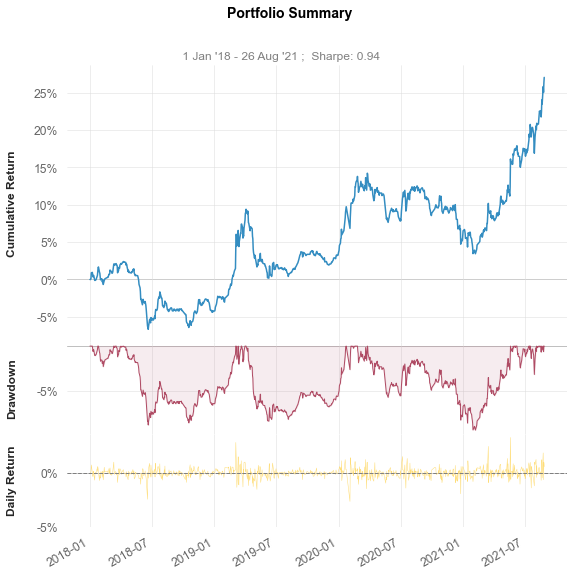

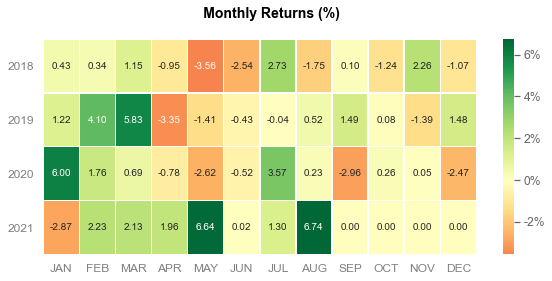

In [37]:
quantstats.reports.plots(returns)